<a href="https://colab.research.google.com/github/hatewxb/ml-projects/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'satisfaction_level'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

satisfaction_level       5
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.satisfaction_level = df_median.satisfaction_level.fillna(df_median.satisfaction_level.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.satisfaction_level = df_mean.satisfaction_level.fillna(df_median.satisfaction_level.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


⏰ Заполнение категориальных признаков не требуется, все данные полные.

Как вариант - можно использовать KNN (K-ближайших соседей)

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная left, определяющая ушел человек из компании или нет, для будущего предсказания шанса ухода работника.```

In [ ]:
df['left_chance'] = df['left']

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left', 'left_chance'],
      dtype='object')

In [ ]:
Y = df['left_chance'] # выбираем целевую переменную (категориальную)
X = df.drop(['left_chance','left'], axis=1) # переменные для проверки влияния

5. **Графический анализ**

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


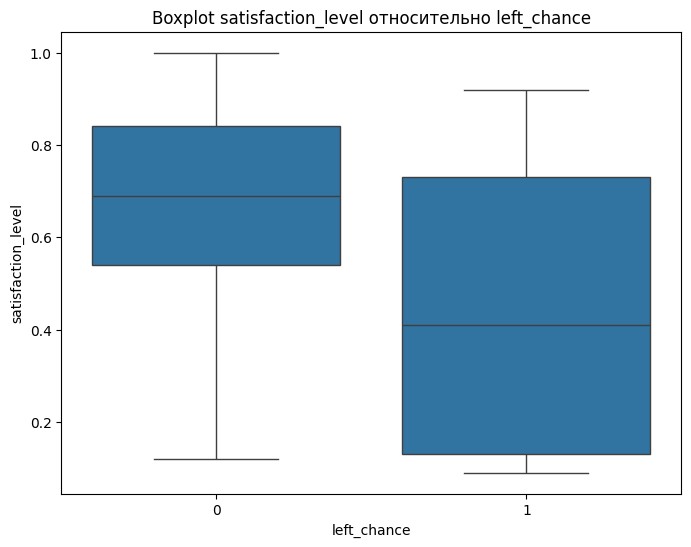

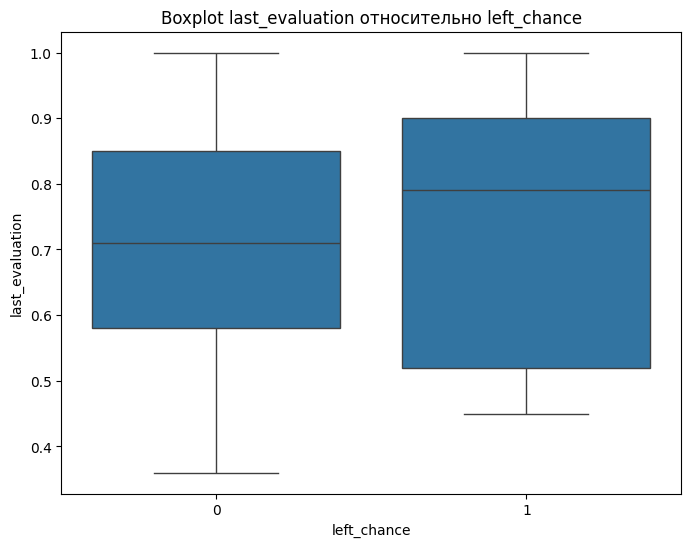

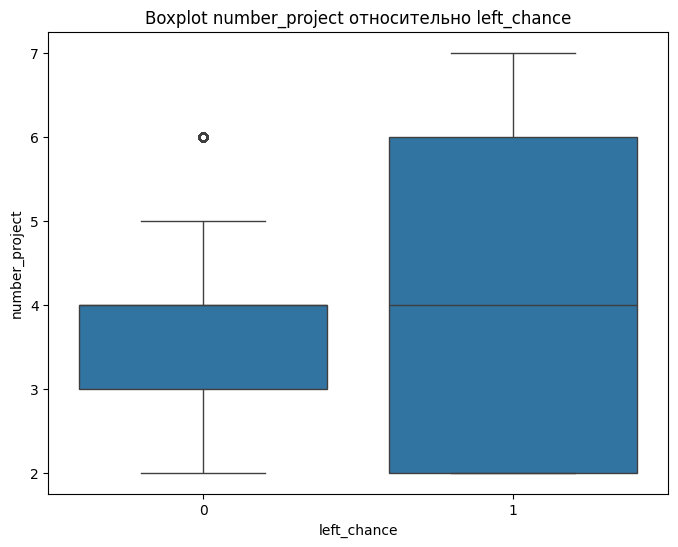

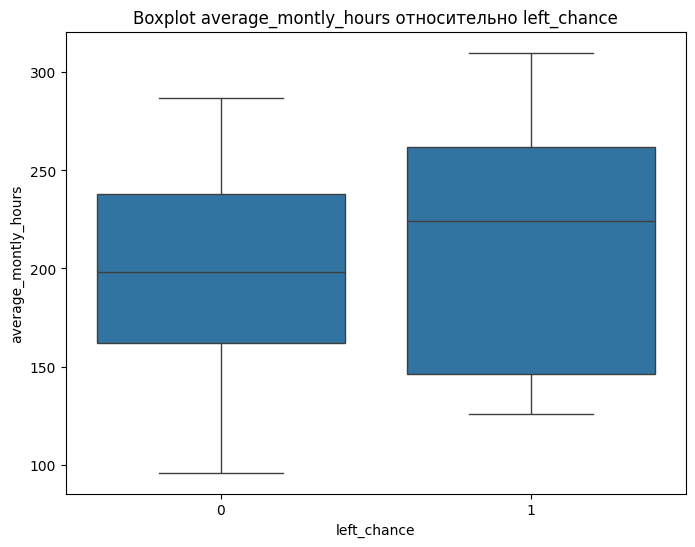

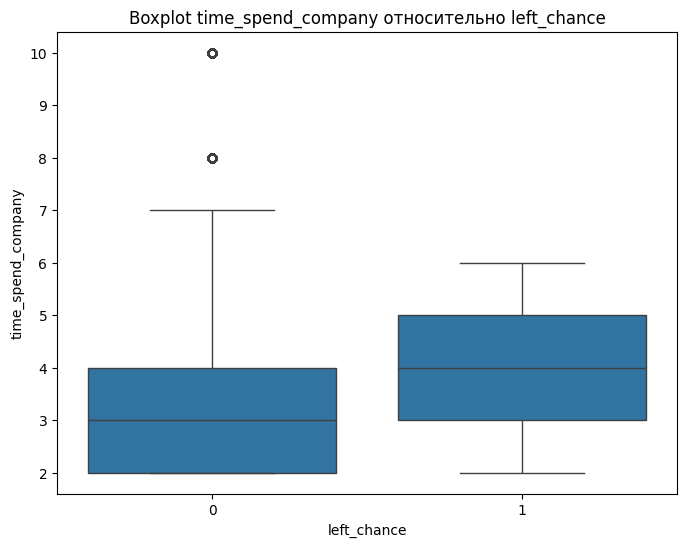

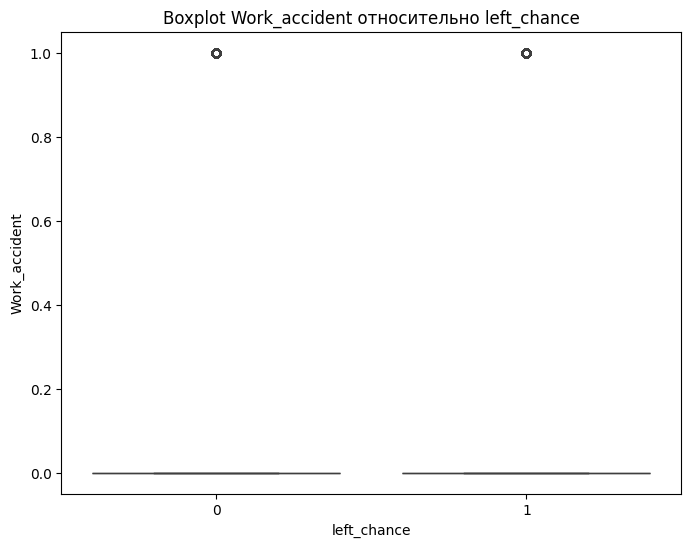

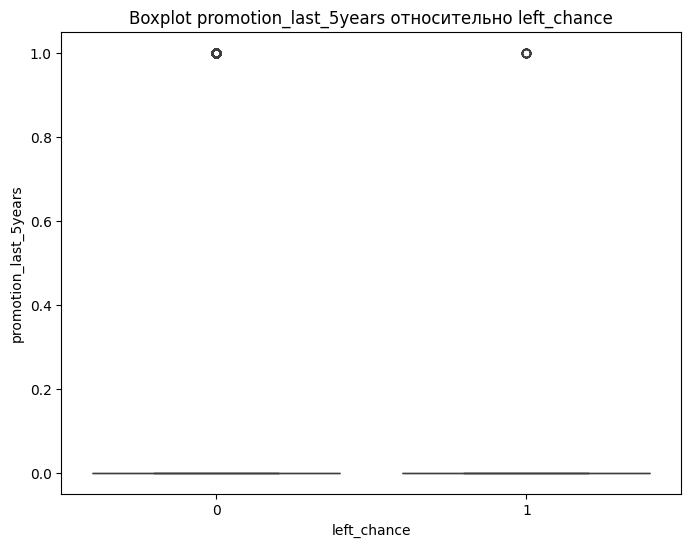

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='left_chance', y=col, data=df)
    plt.title(f'Boxplot {col} относительно left_chance')
    plt.show()

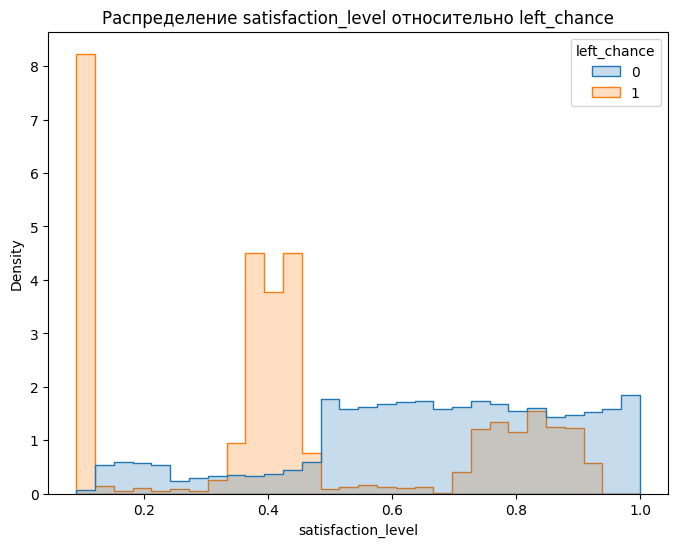

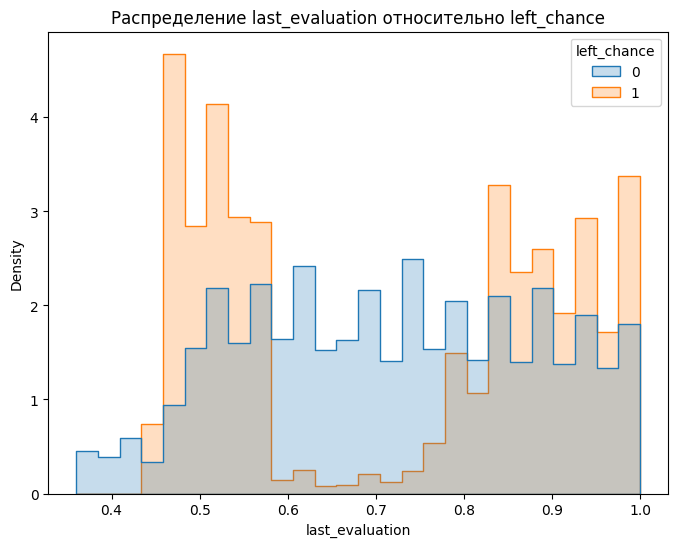

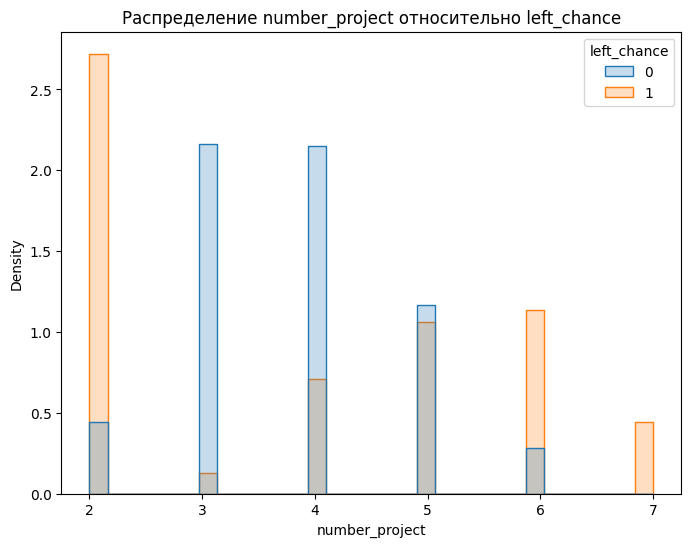

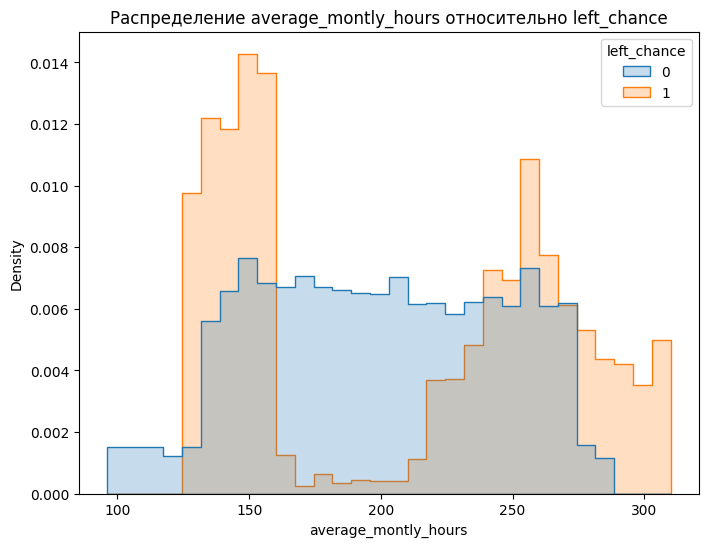

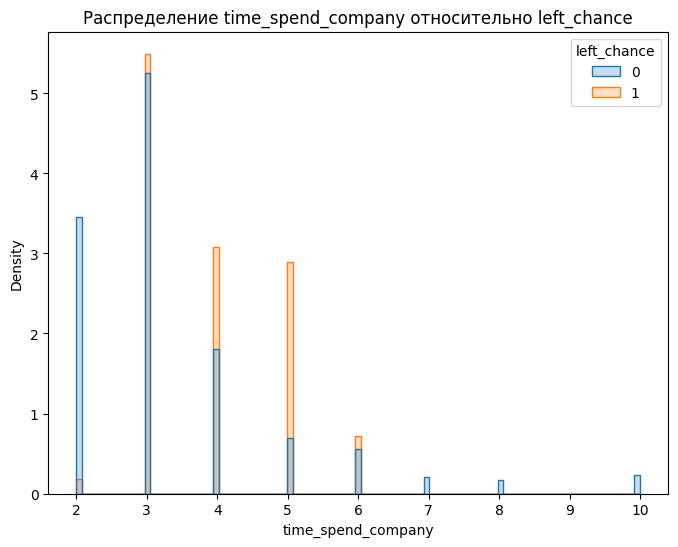

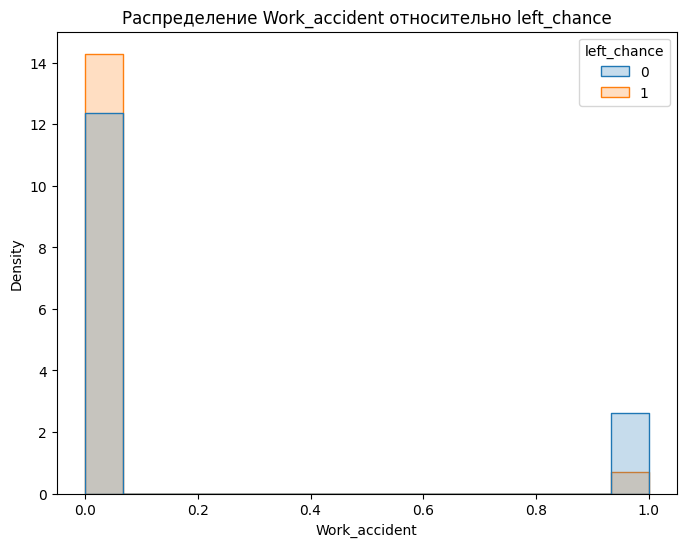

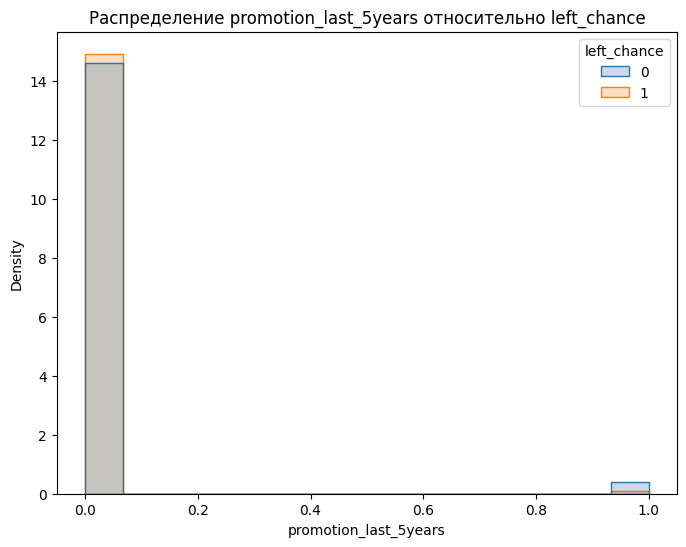

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='left_chance', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно left_chance')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

time_spend_company

average_monthly_hours

number project

last_evaluation

satisfaction_level

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('left_chance')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('left_chance')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

time_spend_company хорошо показывает, что если человек провел в компании слишком мало или слишком много времени, то шансов на увольнение больше

average_monthly_hours показывает, что если человек работает слишком много или слишком мало, то шансов больше

number project слишком мало или слишком много проектов - больше шанс на увольнение

last_evaluation слишком низко или высоко оценен - больше шанс на увольнение

satisfaction_level слишком недоволен - больше шанс на увольнение

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('left_chance')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для satisfaction_level:

               count      mean       std   min   25%   50%   75%   max
left_chance                                                           
0            11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00
1             3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92


Описательная статистика для last_evaluation:

               count      mean       std   min   25%   50%   75%  max
left_chance                                                          
0            11428.0  0.715473  0.162005  0.36  0.58  0.71  0.85  1.0
1             3571.0  0.718113  0.197673  0.45  0.52  0.79  0.90  1.0


Описательная статистика для number_project:

               count      mean       std  min  25%  50%  75%  max
left_chance                                                      
0            11428.0  3.786664  0.979884  2.0  3.0  4.0  4.0  6.0
1             3571.0  3.855503  1.818165  2.0  2.0  4.0  6.0  7.0


Описательная статистика дл

In [ ]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


department                     salary                  
                 count unique    top  freq  count unique  top  freq
left_chance                                                        
0                11428     10  sales  3126  11428      3  low  5144
1                 3571     10  sales  1014   3571      3  low  2172

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,left_chance
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,1.000000
left_chance,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **satisfaction_level и left_chance (-0.388)**:
   - Есть умеренная положительная корреляция между уровнем удовлетворенности и нашей целевой переменной шанса на увольнение. Видим что чем ниже уровень удовлетворенности, тем выше шанс на уход из компании.

2. **number_project и average_montly_hours (0.417)**:
   - Тоже довольно логично, чем над большим количеством проектов человек работает, тем больше у него часов рабочих в месяц.

3. **last_evaluation и average_montly_hours (0.339)**:
   - Тоже логично, чем больше человек работает, тем выше его оценка эффективности.

4. **last_evaluation и number_project	 (0.349)**:
   - Как и с прошлым, чем больше проектов берет на себя человек, тем больше его оценка.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist() + [col for col in X.select_dtypes(include=['int64']).columns.tolist() if col != 'average_montly_hours']


print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['department', 'salary', 'number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,satisfaction_level,last_evaluation,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,...,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,Work_accident_1,promotion_last_5years_1
0,0.38,0.53,157,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,0.80,0.86,262,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.11,0.88,272,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
3,0.72,0.87,223,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.37,0.52,159,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14995,0.37,0.48,160,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14996,0.37,0.53,143,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14997,0.11,0.96,280,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist() + [col for col in X.select_dtypes(include=['int64']).columns.tolist() if col == 'average_montly_hours']

print("Числовые признаки:", numeric_features)

Числовые признаки: ['satisfaction_level', 'last_evaluation', 'average_montly_hours']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,satisfaction_level,last_evaluation,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,...,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,Work_accident_1,promotion_last_5years_1
0,0.318681,0.265625,0.285047,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,0.780220,0.781250,0.775701,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.021978,0.812500,0.822430,False,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
3,0.692308,0.796875,0.593458,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.307692,0.250000,0.294393,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.257009,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14995,0.307692,0.187500,0.299065,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14996,0.307692,0.265625,0.219626,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
14997,0.021978,0.937500,0.859813,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8949
Точность на тестовой выборке: 0.9037

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2286
           1       0.79      0.82      0.80       714

    accuracy                           0.90      3000
   macro avg       0.86      0.87      0.87      3000
weighted avg       0.91      0.90      0.90      3000



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                    Feature  Coefficient
14         number_project_3    -5.127709
21     time_spend_company_5     4.420782
15         number_project_4    -3.854700
22     time_spend_company_6     3.281380
16         number_project_5    -3.207488
20     time_spend_company_4     2.519304
17         number_project_6    -2.442384
19     time_spend_company_3     2.385114
0        satisfaction_level    -1.835905
2      average_montly_hours     1.800284
18         number_project_7     1.699650
12               salary_low     1.658079
26          Work_accident_1    -1.515081
1           last_evaluation     1.308634
13            salary_medium     1.229544
23     time_spend_company_7    -0.964653
25    time_spend_company_10    -0.895424
24     time_spend_company_8    -0.848163
27  promotion_last_5years_1    -0.822867
5             department_hr     0.523926
3          department_RandD    -0.414886
11     department_technical     0.263477
7      department_marketing     0.258378
4     department

**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8943
Отклонение точности: 0.0088


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

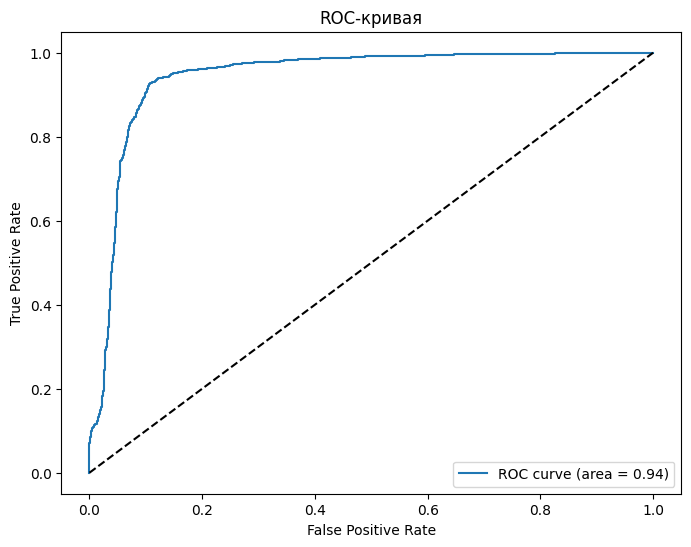

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---